In [2]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('data/processed.tsv', sep='\t')

In [4]:
df2 = pd.read_csv('data/ds-processed.tsv', sep='\t')

In [3]:
df = df[df['yoe_total'] <= 10]
df = df[df['degree'] != 'phd']

In [9]:
df2 = df2[df2['yoe_total'] <= 10]
df2 = df2[df2['degree'] != 'phd']

In [4]:
# df['degree'] = df['degree'].replace({
#     'bachelor': 'Bachelor',
#     'master': 'Master',
# })

In [10]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,5)

<AxesSubplot:xlabel='yoe_total', ylabel='tc_mean'>

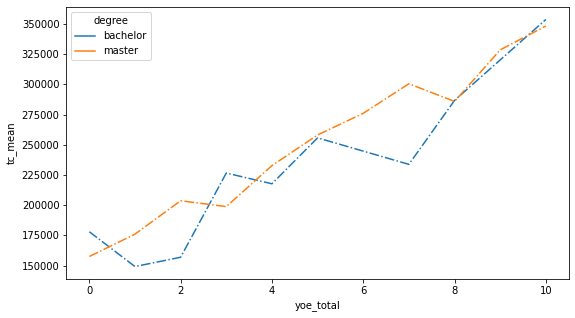

In [13]:
temp_df2 = df2[df2['location'] == 'San Francisco, CA']
grped = temp_df2.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

sns.lineplot(data=grped, x='yoe_total', y='tc_mean', hue='degree', linestyle = '-.')


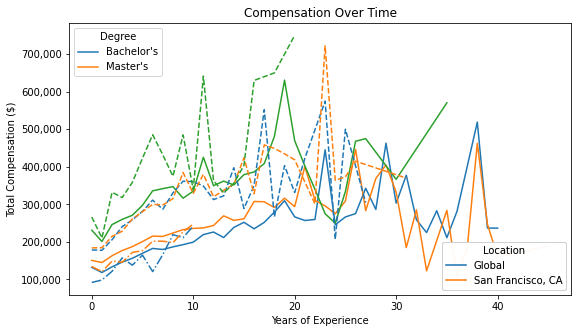

In [11]:
ax = plt.gca()

grped = df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

sns.lineplot(data=grped, x='yoe_total', y='tc_mean', hue='degree')

temp_df = df[df['location'] == 'San Francisco, CA']
grped = temp_df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

sns.lineplot(data=grped, x='yoe_total', y='tc_mean', hue='degree', linestyle = '--')


# temp_df = df[df['location'] == 'Seattle, WA']
# grped = temp_df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
# grped.columns = grped.columns.map('_'.join)
# grped['lower'] = grped['tc_mean'] - grped['tc_std']
# grped['upper'] = grped['tc_mean'] + grped['tc_std']

# sns.lineplot(data=grped, x='yoe_total', y='tc_mean', hue='degree', linestyle = '-.')
l1 = plt.legend(["Bachelor's", "Master's"], loc=2, title='Degree')
lines = ax.get_lines()
l2 = plt.legend([lines[i] for i in [0, 4]],['Global','San Francisco, CA'], loc=4, title='Location')
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ',')))
ax.add_artist(l1)
ax.add_artist(l2)
ax.set_ylabel("Total Compensation ($)")
ax.set_xlabel("Years of Experience")
ax.set_title("Compensation Over Time")
plt.savefig('./vis/fig4.png')

In [15]:
grped = df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

#fig = make_subplots(rows=1, cols=2)
fig = px.line(grped,
    x=grped.index.get_level_values('yoe_total'),
    y='tc_mean',
    color=grped.index.get_level_values('degree'),
    labels={
        "x": "Years of Experience",
        "tc_mean": "Total Compensation ($)",
        "color": "Degree Level"
    },
    title="Compensation Over Time",
    )
fig.update_layout(title_x=0.5)
fig.update_yaxes(range=[110000, 390000])
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
)
temp_df = df[df['location'] == 'San Francisco, CA']
grped = temp_df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

fig = px.line(grped,
    x=grped.index.get_level_values('yoe_total'),
    y='tc_mean',
    color=grped.index.get_level_values('degree'),
    labels={
        "x": "Years of Experience",
        "tc_mean": "Total Compensation ($)",
        "color": "Degree Level"
    },
    title="Compensation Over Time (San Francisco only)",
)
fig.update_layout(title_x=0.5)
fig.update_yaxes(range=[110000, 390000])
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20))

TypeError: line() got an unexpected keyword argument 'fig'

In [8]:
temp_df = df[df['location'] == 'San Francisco, CA']
grped = temp_df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

fig = px.line(grped,
    x=grped.index.get_level_values('yoe_total'),
    y='tc_mean',
    color=grped.index.get_level_values('degree'),
    labels={
        "x": "Years of Experience",
        "tc_mean": "Total Compensation ($)",
        "color": "Degree Level"
    },
    title="Compensation Over Time (San Francisco only)"
)
fig.update_layout(title_x=0.5)
fig.update_yaxes(range=[110000, 390000])
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
)
fig.write_image('./vis/fig2.png')